In [1]:
# diese Klasse muss importiert werde um Zugriff auf den Dataframe zu haben
from helper.data_handler import *
#Mithilfe des StandardScaler können die features normalisiert werden (scaled und centered)
from sklearn.preprocessing import StandardScaler
# bibliothek zum plotten von grafiken
import matplotlib.pyplot as plt

In [2]:
data_handler = DataHandler("zarok01", False)

data_frame = data_handler.data_frame

# dies splittet die trainingsdaten in feautres(HBR, skin_temp,.....) und target (RecommendedAct)
data_only = data_frame.iloc[:, :16]
label = data_frame.iloc[:, 16:]

In [3]:
data_frame["RecommendedAct"].value_counts()

0    15331
1    11750
Name: RecommendedAct, dtype: int64

In [4]:
data_only = data_frame.iloc[:, :16]
label = data_frame.iloc[:, 16:]



In [5]:
from sklearn.preprocessing import StandardScaler
standardized_data = pd.DataFrame(StandardScaler().fit_transform(data_only))

In [6]:
standardized_data.columns = ["M(GSR_Res)", "Std(GSR_Res)", "M(HBR)", "Std(HBR)", "M(RR)", "Std(RR)", \
                                   "M(Motion)", "Std(Motion)", "M(ST)", "Std(ST)", "MHR(RR)", "MRRI(RR)", "NN50(RR)", \
                                   "PNN50(RR)", "RMSSD(RR)", "SDNN(RR)"]




In [7]:
data_without_st = standardized_data.drop(["M(ST)"], axis = 1, inplace = False)

In [ ]:
data_without_st

In [8]:
from sklearn import tree
import graphviz 


clf = tree.DecisionTreeClassifier(min_samples_split=800)
clf = clf.fit(data_without_st, label)

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names = data_without_st.columns,
                         filled=True) 
graph = graphviz.Source(dot_data) 
graph.render("dat_tree")

'dat_tree.pdf'

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(data_without_st, label, test_size=0.25)

clf = RandomForestClassifier(max_depth=15, n_estimators=20, random_state=42)
clf.fit(X_train,y_train)

importances = clf.feature_importances_

std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


/Users/Shared/anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Feature ranking:
1. feature 0 (0.360864)
2. feature 2 (0.125405)
3. feature 1 (0.081482)
4. feature 9 (0.060164)
5. feature 13 (0.059579)
6. feature 4 (0.053761)
7. feature 10 (0.051068)
8. feature 14 (0.051055)
9. feature 5 (0.045365)
10. feature 3 (0.040265)
11. feature 6 (0.025124)
12. feature 12 (0.015330)
13. feature 11 (0.014779)
14. feature 8 (0.014426)
15. feature 7 (0.001334)


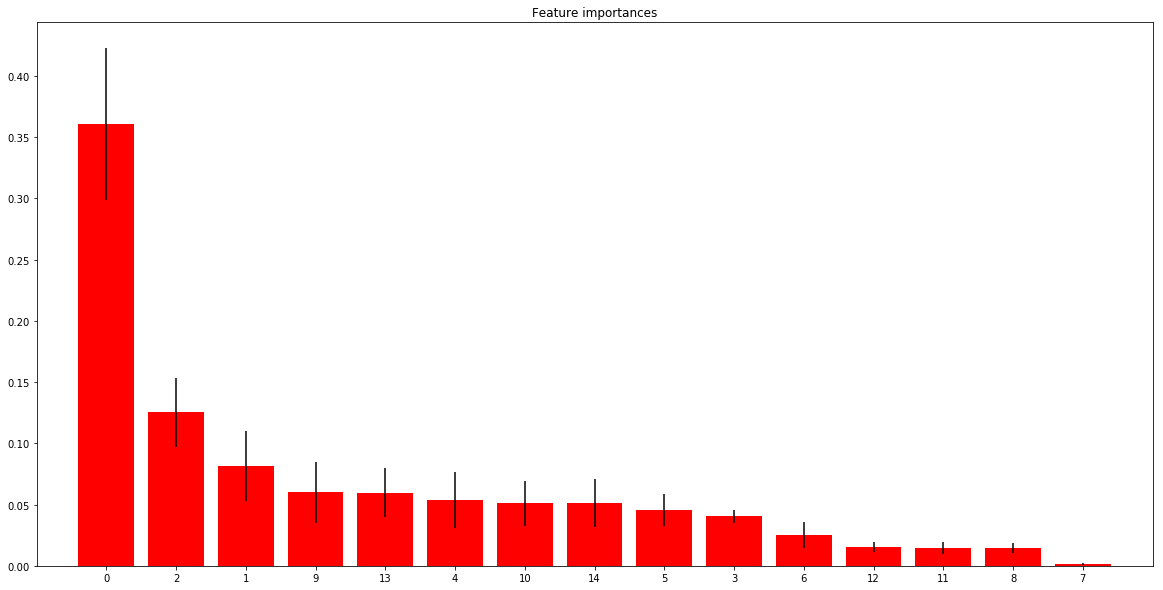

In [12]:
import matplotlib.pyplot as plt


plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_test.shape[1]), indices)
plt.xlim([-1, X_test.shape[1]])
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [11]:
scores = clf.score(X_test,y_test)
print ("The R^2 score for RecommendedAct is: {}" .format(scores))

The R^2 score for RecommendedAct is: 0.9174420321961305
